In [0]:
import gc

In [0]:
import pandas as pd 
import numpy as np
import glob
import matplotlib.pyplot as plt

In [0]:
train_data=pd.read_csv("../data/RAW_training_set.csv")
test_data=pd.read_csv("../data/RAW_test_set.csv")

# Feature Generation

## 1.Date

In [0]:
# dir(train_data['Game_Date'].dt)

In [0]:
train_data['Game_Date']=pd.to_datetime(train_data['Game_Date'])
train_data['day_of_week']=train_data['Game_Date'].dt.weekday_name
train_data['month']=train_data['Game_Date'].dt.month

In [0]:
test_data['Game_Date']=pd.to_datetime(test_data['Game_Date'])
test_data['day_of_week']=test_data['Game_Date'].dt.weekday_name
test_data['month']=test_data['Game_Date'].dt.month

In [0]:
train_data.head()

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Country,Rounded Viewers,day_of_week,month
0,2016-17,21600001,2016-10-25,NYK,CLE,C113,18,Tuesday,10
1,2016-17,21600001,2016-10-25,NYK,CLE,C193,1,Tuesday,10
2,2016-17,21600001,2016-10-25,NYK,CLE,C126,4,Tuesday,10
3,2016-17,21600001,2016-10-25,NYK,CLE,C163,11,Tuesday,10
4,2016-17,21600001,2016-10-25,NYK,CLE,C73,3,Tuesday,10


# 2.country

In [0]:
print("there are {} countries.".format(len(np.unique(train_data['Country']))))

there are 228 countries.


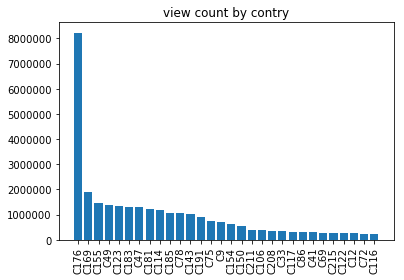

In [0]:
view_table=pd.pivot_table(train_data,values='Rounded Viewers',index='Country',aggfunc=np.sum)
view_table=view_table.sort_values(by=['Rounded Viewers'],ascending=False)
label=view_table.index[0:30]
value=view_table.values[0:30]
index=np.arange(len(label))
plt.bar(index,value)
plt.xticks(index,label,rotation=90)
plt.title("view count by contry")
plt.show()

In [0]:
# choose top 50 and put all other into 'others' catogory

In [0]:
top_50_country=view_table.index[0:50]
top_50_idx=list(map(lambda thiscountry: True if thiscountry in top_50_country else False, train_data['Country']))
not_top_50_idx=[not idx  for idx in top_50_idx]

In [0]:
print ("top 50 country shape",train_data[top_50_idx].shape)

top 50 country shape (99988, 9)


In [0]:
print("reset shape ",train_data[not_top_50_idx].shape)

reset shape  (180637, 9)


In [0]:
print("total data shape",train_data.shape)

total data shape (280625, 9)


In [0]:
top_50_train_data =train_data[top_50_idx].copy()
other=train_data[not_top_50_idx].copy()

In [0]:
other_count=other.groupby(['Game_ID']).sum()
del other_count['month']
other_count.reset_index(inplace=True)

In [0]:
del other['Rounded Viewers']
del other['Country']

In [0]:
aggregate_df =pd.DataFrame()
aggregate_df=other.drop_duplicates().reset_index(drop=True)
aggregate_df['Country']='other'
aggregate_df.sort_values(['Game_ID'],inplace=True)
aggregate_df=aggregate_df.merge(other_count, left_on='Game_ID', right_on='Game_ID', how='outer')

In [0]:
new_train_data=pd.concat([aggregate_df,top_50_train_data],axis=0)

In [0]:
new_train_data.shape[0]==top_50_train_data.shape[0]+2000

True

In [0]:
country_list=list(set(new_train_data['Country']))

In [0]:
# insert country into test_data

In [0]:
test_data.head()

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers,day_of_week,month
0,2016-17,21600010,2016-10-26,DEN,NOP,NaN,Wednesday,10
1,2016-17,21600023,2016-10-28,HOU,DAL,NaN,Friday,10
2,2016-17,21600027,2016-10-29,BOS,CHA,NaN,Saturday,10
3,2016-17,21600026,2016-10-29,ATL,PHI,NaN,Saturday,10
4,2016-17,21600048,2016-11-01,LAL,IND,NaN,Tuesday,11


In [0]:
country_df=pd.DataFrame(country_list,columns=['Country'])
# country_df
country_df['key'] = 0
test_data['key'] = 0
new_test=merge(test_data,country_df,on='key')
del new_test['key']

In [0]:
new_test.shape[0]==len(country_df)*len(test_data)

True

In [0]:
test=new_test
train=new_train_data
del new_test
del new_train_data

In [0]:
gc.collect()

24300

# one hot encoder

In [0]:
y_train=train['Rounded Viewers']
y_train_log =np.log1p(y_train)
X_train=train.drop(columns=['Rounded Viewers'])
X_train['month']=X_train['month'].astype('category')
X_train=pd.get_dummies(X_train)
del X_train['Game_ID']
del X_train['Game_Date']

In [0]:
X_train.head()

,Away_Team_ATL,Away_Team_BKN,Away_Team_BOS,Away_Team_CHA,Away_Team_CHI,Away_Team_CLE,Away_Team_DAL,Away_Team_DEN,Away_Team_DET,Away_Team_GSW,...,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,month_1,month_2,month_3,month_4,month_10,month_11,month_12
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [0]:
X_train=X_train.sort_index(axis=1)

In [0]:
X_test=test.drop(columns=['Total_Viewers','Game_ID',"Game_Date"])
X_test['month']=X_test['month'].astype('category')

In [0]:
X_test=pd.get_dummies(X_test)
# X_test.head()
X_test=X_test.sort_index(axis=1)

,Season_2016-17,Season_2017-18,Away_Team_ATL,Away_Team_BKN,Away_Team_BOS,Away_Team_CHA,Away_Team_CHI,Away_Team_CLE,Away_Team_DAL,Away_Team_DEN,...,Country_C72,Country_C75,Country_C77,Country_C78,Country_C79,Country_C8,Country_C80,Country_C86,Country_C9,Country_other
0,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [0]:
# model xgboost
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [0]:
lgb_model=LGBMRegressor()
lgbm_params = {
#     "boosting":"dart",
#     "application":"conitunous",
    "learning_rate":0.1,
    "min_data_in_leaf":30,
    "num_leaves":31,
    "max_depth":-1,
#     "scale_pos_weight":2,
#     "drop_rate":0.02,
    "metric":"rmse",
    "min_split_gain":0.0,
#     "colsample_bytree":0.0
}
lgb_model.set_params(**lgbm_params) #base model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.1, max_depth=-1, metric='rmse',
       min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=30,
       min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
       objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
       silent=True, subsample=1.0, subsample_for_bin=200000,
       subsample_freq=0)

# parameter tuning

**max num_leaves**  This is the main parameter to control the complexity of the tree model.   
Theoretically, we can set num_leaves = 2^(max_depth) to obtain the same number of leaves as depth-wise tree. 

**min_data_in_leaf** This is a very important parameter to prevent over-fitting in a leaf-wise tree.   
Its optimal value depends on the number of training samples and num_leaves.   
Setting it to a large value can avoid growing too deep a tree, but may cause under-fitting.   
In practice, setting it to hundreds or thousands is enough for a large dataset.

**max_depth. ** You also can use max_depth to limit the tree depth explicitly.

In [0]:
from sklearn.model_selection import GridSearchCV
param_test1 = {
 'num_leaf':list(range(1,300,100)),
#  'min_data_in_leaf':list(range(1,100,20))
}
gsearch1 = GridSearchCV(estimator = lgb_model, 
param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5,verbose=10)

gsearch1.fit(X_train,y_train_log)

gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    8.3s
[Parallel(n_jobs=4)]: Done  10 out of  15 | elapsed:   14.1s remaining:    7.0s
[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:   16.7s remaining:    4.1s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:   19.0s finished
C:\Wesley_Tao\6.Software\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -0.37102, std: 0.13420, params: {'num_leaf': 1},
  mean: -0.37102, std: 0.13420, params: {'num_leaf': 101},
  mean: -0.37102, std: 0.13420, params: {'num_leaf': 201}],
 {'num_leaf': 1},
 -0.37101747526198087)

In [0]:
lgb_model.set_params(**gsearch1.best_params_)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.1, max_depth=-1, metric='rmse',
       min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=30,
       min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaf=1,
       num_leaves=31, objective=None, random_state=None, reg_alpha=0.0,
       reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

In [0]:
param_test2 = {
 'min_data_in_leaf':list(range(11,1000,100))
}
gsearch2 = GridSearchCV(estimator = lgb_model, 
param_grid = param_test2, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5,verbose=10)

gsearch2.fit(X_train,y_train)

gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    8.6s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   15.5s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   23.6s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   35.0s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   51.4s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  1.3min finished
C:\Wesley_Tao\6.Software\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -109148.67656, std: 21610.55340, params: {'min_data_in_leaf': 11},
  mean: -192251.38324, std: 42344.56622, params: {'min_data_in_leaf': 111},
  mean: -197543.07161, std: 41698.94008, params: {'min_data_in_leaf': 211},
  mean: -198179.41395, std: 43603.82281, params: {'min_data_in_leaf': 311},
  mean: -196218.46087, std: 42908.45887, params: {'min_data_in_leaf': 411},
  mean: -196356.65788, std: 43588.19156, params: {'min_data_in_leaf': 511},
  mean: -196428.99208, std: 41103.25850, params: {'min_data_in_leaf': 611},
  mean: -192703.52224, std: 38286.68817, params: {'min_data_in_leaf': 711},
  mean: -193490.96236, std: 38264.56280, params: {'min_data_in_leaf': 811},
  mean: -194866.24863, std: 39109.97733, params: {'min_data_in_leaf': 911}],
 {'min_data_in_leaf': 11},
 -109148.67656288689)

In [0]:
lgb_model.set_params(**gsearch2.best_params_)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.1, max_depth=-1, metric='rmse',
       min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=11,
       min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaf=1,
       num_leaves=31, objective=None, random_state=None, reg_alpha=0.0,
       reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

# evaluation

In [0]:
# from sklearn.utils import check_arrays
def mean_absolute_percentage_error(y, y_pred): 
    return np.mean(np.abs((y - y_pred) / y))

In [0]:
import sklearn.metrics
mape=sklearn.metrics.make_scorer(mean_absolute_percentage_error,greater_is_better=True)


In [0]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
NUM_FOLDS = 5 
def mape_cv(model):
    kf = KFold(NUM_FOLDS, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= cross_val_score(model, X_train.values, y_train,verbose=0, scoring=mape, cv = kf)
    return(rmse)

In [4]:
mape_cv(lgb_model)

NameError: ignored

# submission

In [0]:
lgb_model.fit(X_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.1, max_depth=-1, metric='rmse',
       min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=11,
       min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaf=1,
       num_leaves=31, objective=None, random_state=None, reg_alpha=0.0,
       reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

In [0]:
y_pred=lgb_model.predict(X_test)

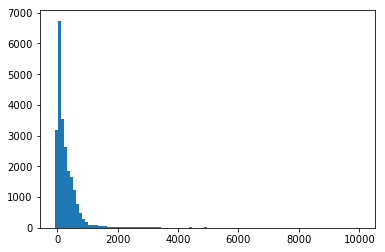

In [0]:
plt.hist(y_pred,bins=100)
plt.show()

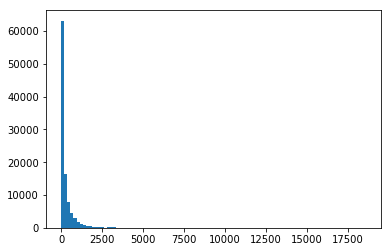

In [0]:
plt.hist(y_train,bins=100)
plt.show()

In [0]:
test['Total_Viewers']=y_pred

In [0]:
test.head()

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers,day_of_week,month,Country
0,2016-17,21600010,2016-10-26,DEN,NOP,350.055154,Wednesday,10,C75
1,2016-17,21600010,2016-10-26,DEN,NOP,141.286416,Wednesday,10,C117
2,2016-17,21600010,2016-10-26,DEN,NOP,188.538805,Wednesday,10,C211
3,2016-17,21600010,2016-10-26,DEN,NOP,74.394198,Wednesday,10,C77
4,2016-17,21600010,2016-10-26,DEN,NOP,103.896034,Wednesday,10,C80


In [0]:
# aggregate over country

In [0]:
submission=test.drop(columns=['month','Country','day_of_week'])

In [0]:
submission=submission.groupby(by=['Season','Game_Date','Game_ID','Away_Team','Home_Team']).sum()

In [0]:
submission.reset_index(inplace=True)

In [0]:
submission['Total_Viewers']=submission['Total_Viewers'].round(0)

In [0]:
submission.head()

,Season,Game_Date,Game_ID,Away_Team,Home_Team,Total_Viewers
0,2016-17,2016-10-26,21600010,DEN,NOP,18875.0
1,2016-17,2016-10-28,21600023,HOU,DAL,26079.0
2,2016-17,2016-10-29,21600026,ATL,PHI,27130.0
3,2016-17,2016-10-29,21600027,BOS,CHA,35885.0
4,2016-17,2016-11-01,21600048,LAL,IND,21443.0


In [0]:
submission.to_csv("submission.csv",index=False)